In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import simpy
import math

NEW_CUSTOMERS = 100  # Número total de clientes
INTERVAL_CUSTOMERS = 0  # Tiempo entre clientes
MIN_PATIENCE = 0  # Paciencia minima
MAX_PATIENCE = 0  # Paciencia maxima
TIME_IN_BANK = 0

CLIENTES=0 #numero de clientes q han entrado al banco
ATENDIDOS=0 #cantidad de clientes atendidos
ABANDONAN=0 #clientes que han abandonado el banco por espera
tfila=0 #suma de tiempo de espera de los clientes en la fila
tbanco=0 #suma de tiempo q el cliente duro en el banco
Tfila=0 #suma de tamaño de fila
fila=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente de la fila
banco=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente del banco

SEED_U=24242 #semilla para distribucion uniforme
SEED_E=24242 #semilla para distribucion exponencial

def source(env, nclientes, interval, counter):
    #interval: media deseada del intervalo de tiempo entre la llegada de nuevos clientes
    #counter:  mostrador donde se atiende los clientes
    semilla=5 #semila para exponencial
    
    #Fuente genera clientes azar
    for i in range(nclientes):
        c = customer(env, 'Cliente%02d' % i, counter)
        env.process(c)
        semilla,t=exponencial(semilla,1.0 / interval)
        #t = random.expovariate(1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter):
    
    global ATENDIDOS,ABANDONAN,CLIENTES,tfila,tbanco,Tfila,SEED_U,SEED_E
    arrive = env.now
    
    CLIENTES+=1;
    banco[0].append(arrive)
    banco[1].append(CLIENTES-ATENDIDOS-ABANDONAN)
    if CLIENTES-ATENDIDOS-ABANDONAN > 1:
        fila[0].append(arrive)
        fila[1].append(CLIENTES-ATENDIDOS-ABANDONAN-1)
    
    with counter.request() as req:
        SEED_U,patience = uniforme(SEED_U,MIN_PATIENCE, MAX_PATIENCE)
        
        results = yield req | env.timeout(patience)
        
        Tfila +=CLIENTES-ATENDIDOS-ABANDONAN-1
        if CLIENTES-ATENDIDOS-ABANDONAN > 1:
            fila[0].append(env.now)
            fila[1].append(CLIENTES-ATENDIDOS-ABANDONAN-2)
        
        wait = env.now - arrive
        
        tfila+=wait
        
        if req in results:
            
            SEED_E,tib = exponencial(SEED_E,1.0 / TIME_IN_BANK)
            yield env.timeout(tib)
            ATENDIDOS+=1;
        else:
            ABANDONAN+=1
        tbanco=env.now-arrive
        banco[0].append(env.now)
        banco[1].append(CLIENTES- ATENDIDOS-ABANDONAN)
        
def random(x):
    a=1456723
    b=1276431929
    m=2**34
    x=(a*x+b)%m
    u=float(x)/m
    return u,x

def exponencial(x,landa):
    u,x = random(x)
    return x,-math.log(1-u)/landa

def uniforme(x,a,b):
    u,x = random(x)
    return x,a+u*(b-a)

def estadisticas():
    print('Cantidad de clientes que llegaron: '+str(CLIENTES))
    print('Cantidad de clientes que fueron atendidos en el banco: '+str(ATENDIDOS))
    print('Cantidad de clientes que abandonaron el banco: '+str(ABANDONAN))
    print('Tiempo promedio de espera del cliente en la fila: '+str(tfila/CLIENTES))
    print('Tiempo promedio del cliente en el banco: '+str(tbanco/CLIENTES))
    print('Tamaño promedio de la fila: '+str(Tfila/CLIENTES))

def grafica():
    #banco
    xb=np.repeat(banco[0],2).tolist()
    xb.append(0)
    tb=np.repeat(banco[1],2).tolist()
    tb.insert(0,0)
    
    plt.title('Cantidad de personas en el banco')
    plt.plot(xb,tb)
    plt.ylabel('Personas')
    plt.xlabel('Tiempo')
    plt.show()
    
    #fila
    xf=np.repeat(fila[0],2).tolist()
    xf.append(0)
    tf=np.repeat(fila[1],2).tolist()
    tf.insert(0,0)
    
    plt.plot(xf,tf)
    plt.title('Cantidad de personas en la fila')
    plt.xlim(0,max(banco[0]))
    plt.ylabel('Personas')
    plt.xlabel('Tiempo')
    plt.show()

# Escenario 1

Escenario 1


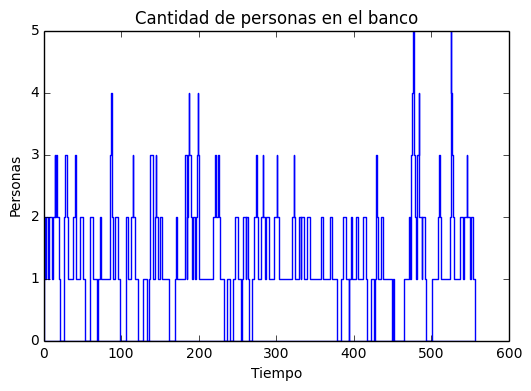

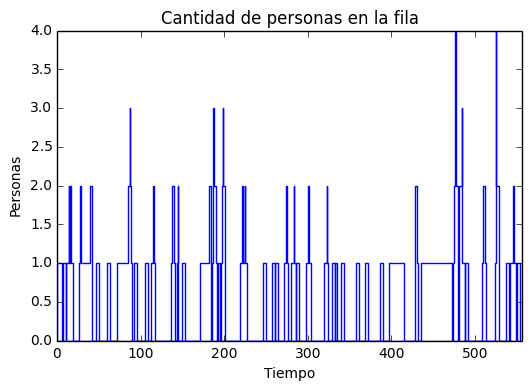

Cantidad de clientes que llegaron: 100
Cantidad de clientes que fueron atendidos en el banco: 28
Cantidad de clientes que abandonaron el banco: 72
Tiempo promedio de espera del cliente en la fila: 2.43630469336
Tiempo promedio del cliente en el banco: 0.323830649427
Tamaño promedio de la fila: 1


In [20]:
INTERVAL_CUSTOMERS = 5.0
MIN_PATIENCE = 2
MAX_PATIENCE = 4
TIME_IN_BANK=13.0

print('Escenario 1')
CLIENTES=0 #numero de clientes q han entrado al banco
ATENDIDOS=0 #cantidad de clientes atendidos
ABANDONAN=0 #clientes que han abandonado el banco por espera
tfila=0 #suma de tiempo de espera de los clientes en la fila
tbanco=0 #suma de tiempo q el cliente duro en el banco
Tfila=0 #suma de tamaño de fila
fila=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente de la fila
banco=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente del banco

SEED_U=24242 #semilla para distribucion uniforme
SEED_E=24242 #semilla para distribucion exponencial

#Iniciar proceso
env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)#cantidad de mostradores
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

grafica()
estadisticas()

# Escenario 2

Escenario 2


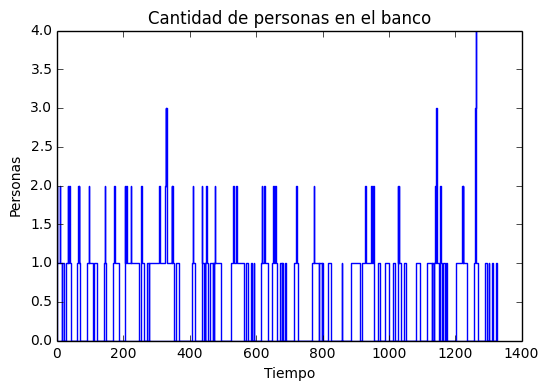

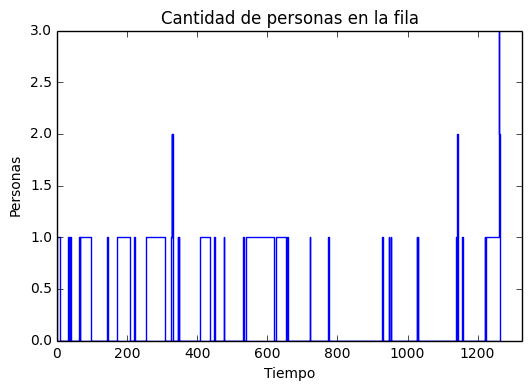

Cantidad de clientes que llegaron: 100
Cantidad de clientes que fueron atendidos en el banco: 64
Cantidad de clientes que abandonaron el banco: 36
Tiempo promedio de espera del cliente en la fila: 0.835166775123
Tiempo promedio del cliente en el banco: 0.0410371642577
Tamaño promedio de la fila: 0


In [19]:
INTERVAL_CUSTOMERS = 12.0
MIN_PATIENCE = 1
MAX_PATIENCE = 3
TIME_IN_BANK = 9.0

print('Escenario 2')
CLIENTES=0 #numero de clientes q han entrado al banco
ATENDIDOS=0 #cantidad de clientes atendidos
ABANDONAN=0 #clientes que han abandonado el banco por espera
tfila=0 #suma de tiempo de espera de los clientes en la fila
tbanco=0 #suma de tiempo q el cliente duro en el banco
Tfila=0 #suma de tamaño de fila
fila=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente de la fila
banco=[[],[]] #[tiempo][clientes] tiempo de entrada y salida de un cliente del banco

SEED_U=24242
SEED_E=24242

env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

grafica()
estadisticas()

# Analisis de resultados
De los tres escenarios el mejor por mucho es el segundo ya que en este caso fueron atendidos la mayor cantidad de clientes, un 64% mientras el resto abandonó el banco. Mucho mayor al 28% de personas atendias en el primer escenario